# Julia言語と高校数学

このノートブックでは、Julia言語を使って高校数学の様々な分野を学習します。

Juliaはを用いて、数学の概念を直感的に表現できます。

![自己紹介](./p01.png)

## 1. Julia言語の概要

Juliaは統計処理や科学技術計算、機械学習に強いプログラミング言語です。
Google Colabで無料で利用できるようになりました。

**特徴：**
- 高速な数値計算
- 数学的記法に近い文法
- 豊富な数学・統計ライブラリ

公式サイト: https://julialang.org/

![Julialang](./julialang.png)

https://zenn.dev/dannchu/articles/296dce4bf7c701

![colab](./googlecolab.png)





In [6]:
# 必要なパッケージのインストール（初回のみ、10分程度かかります）
using Pkg

# パッケージリスト
packages = [
    "Plots",
    "PlotlyJS",
    "Nemo",
    "Symbolics",
    "SimplePolynomials",
    "Optim",
    "Distributions",
    "Combinatorics",
    "StatsPlots"
]

for pkg in packages
    try
        Pkg.add(pkg)
    catch e
        println("パッケージ $pkg のインストールに失敗: $e")
    end
end

println("パッケージのインストールが完了しました。")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.to

パッケージのインストールが完了しました。


In [7]:
# パッケージの読み込み
using Plots, Nemo, Symbolics, SimplePolynomials, Optim, Distributions, Combinatorics, StatsPlots
plotlyjs()
println("ライブラリの読み込みが完了しました。")

ライブラリの読み込みが完了しました。


## 2. 基本的な計算

In [17]:
# 四則演算
println("1 + 1 = ", 1 + 1)
println("2^3 = ", 2^3)
println("10 ÷ 3 = ", 10 ÷ 3)  # ÷は\divで入力

1 + 1 = 2
2^3 = 8
10 ÷ 3 = 3


In [27]:
# 数学定数
@show π
@show float(π)
@show √2    # √は\sqrtで入力
@show ℯ
@show float(ℯ)  # ℯは\eulerで入力
println("黄金比 φ = ", (1 + √5)/2)

π = π
float(π) = 3.141592653589793
√2 = 1.4142135623730951
ℯ = ℯ
float(ℯ) = 2.718281828459045
黄金比 φ = 1.618033988749895


In [28]:
# 分数計算（小数と有理数の違い）
println("小数計算: 1/3 + 3*2/4 = ", 1/3 + 3*2/4)
println("有理数計算: 1//3 + 3*2//4 = ", 1//3 + 3*2//4)  # //で有理数
println("有理数の約分: 12//8 = ", 12//8)

小数計算: 1/3 + 3*2/4 = 1.8333333333333333
有理数計算: 1//3 + 3*2//4 = 11//6
有理数の約分: 12//8 = 3//2


In [ ]:
# 関数の定義
f(x) = x^2 + 2x - 4

println("f(x) = x² + 2x - 4")
println("f(0) = ", f(0))
println("f(2) = ", f(2))
println("f(-1) = ", f(-1))
println("f(√2) = ", f(√2))

f(x) = x² + 2x - 4
f(0) = -4
f(2) = 4
f(-1) = -5
f(√2) = 0.8284271247461907


## 3. グラフ描画

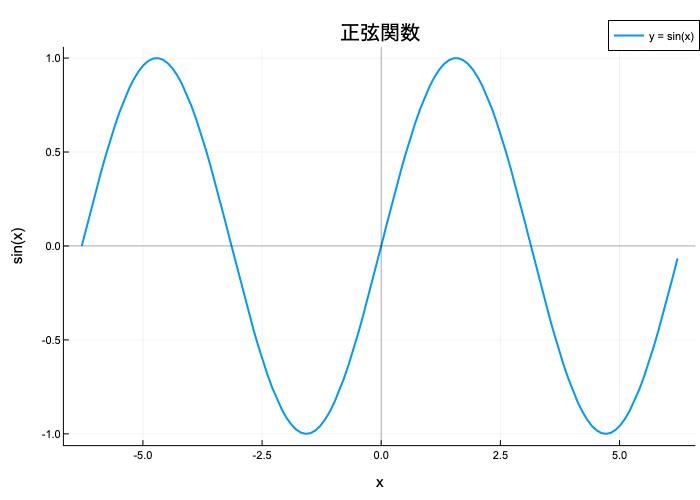

In [8]:
# sin関数のグラフ
x_range = -2π:0.1:2π
plot(x_range, sin.(x_range), 
     xlabel="x", ylabel="sin(x)", 
     title="正弦関数", 
     lw=2, 
     label="y = sin(x)")

# x軸、y軸の補助線
hline!([0], color=:black, alpha=0.3, label="")
vline!([0], color=:black, alpha=0.3, label="")

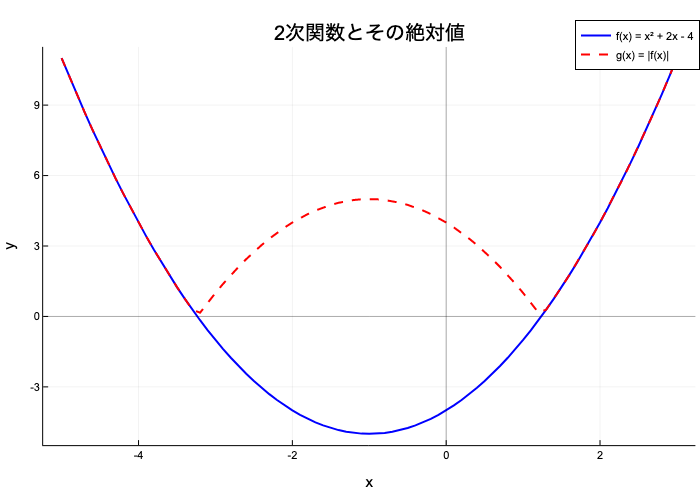

In [9]:
# 2次関数のグラフ
f(x) = x^2 + 2x - 4
g(x) = abs(f(x))

x_vals = -5:0.1:3
plot(x_vals, f.(x_vals), 
     label="f(x) = x² + 2x - 4", 
     lw=2, 
     color=:blue)

plot!(x_vals, g.(x_vals), 
      label="g(x) = |f(x)|", 
      lw=2, 
      ls=:dash, 
      color=:red)

# 軸の補助線
hline!([0], color=:black, alpha=0.3, label="")
vline!([0], color=:black, alpha=0.3, label="")

title!("2次関数とその絶対値")
xlabel!("x")
ylabel!("y")

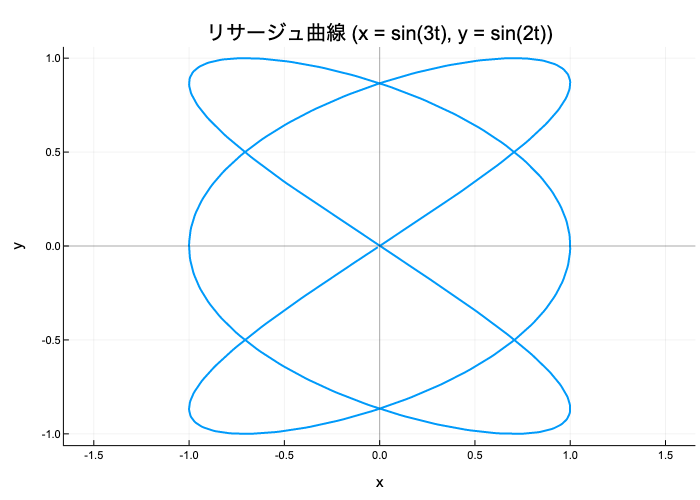

In [10]:
# 媒介変数表示（リサージュ曲線）
t = 0:0.01:2π
xs = sin.(3t)
ys = sin.(2t)

plot(xs, ys, 
     aspect_ratio=:equal, 
     title="リサージュ曲線 (x = sin(3t), y = sin(2t))", 
     lw=2,
     label="",
     xlabel="x",
     ylabel="y")

# 軸の補助線
hline!([0], color=:black, alpha=0.3, label="")
vline!([0], color=:black, alpha=0.3, label="")

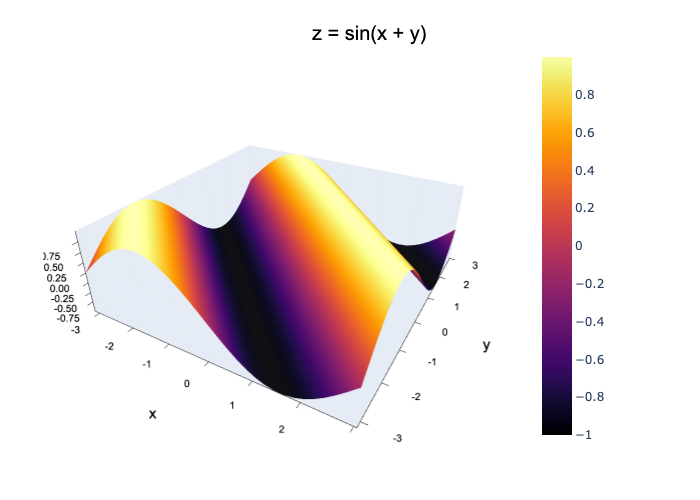

In [11]:
# 3D曲面
x = -π:0.2:π
y = -π:0.2:π
z = [sin(xi + yi) for xi in x, yi in y]

surface(x, y, z, 
        title="z = sin(x + y)",
        xlabel="x",
        ylabel="y",
        zlabel="z")

## 4. 方程式の解法

In [23]:
# 記号的解法
using Nemo , Symbolics

@variables x
equation = x^2 + 2x - 4

println("方程式: x² + 2x - 4 = 0")
solutions = symbolic_solve(equation ~ 0, x)

方程式: x² + 2x - 4 = 0


2-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 -1 + √(5)
 -1 - √(5)

In [29]:
f(x) =  x^2 + 2x - 4
f(-1+√5)

0.0

In [15]:
[Float64(substitute(sol, Dict())) for sol in solutions]

2-element Vector{Float64}:
  1.2360679774997898
 -3.23606797749979

In [13]:
# 解の公式の一般形
@variables a b c x
general_equation = a*x^2 + b*x + c

println("一般的な2次方程式: ax² + bx + c = 0")
general_solutions = symbolic_solve(general_equation ~ 0, x)

一般的な2次方程式: ax² + bx + c = 0


2-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 (-b + √(-4a*c + b^2)) / (2a)
 (-b - √(-4a*c + b^2)) / (2a)

In [16]:
# 数値的解法
using SimplePolynomials

x = getx()
println("x⁵ - 1 = 0 の解（5次単位根）:")
Z = SimplePolynomials.roots(x^5 - 1)


x⁵ - 1 = 0 の解（5次単位根）:


5-element Vector{ComplexF64}:
 -0.8090169943749478 - 0.5877852522924731im
 -0.8090169943749478 + 0.5877852522924731im
 0.30901699437494723 - 0.9510565162951534im
 0.30901699437494723 + 0.9510565162951534im
  0.9999999999999999 + 0.0im

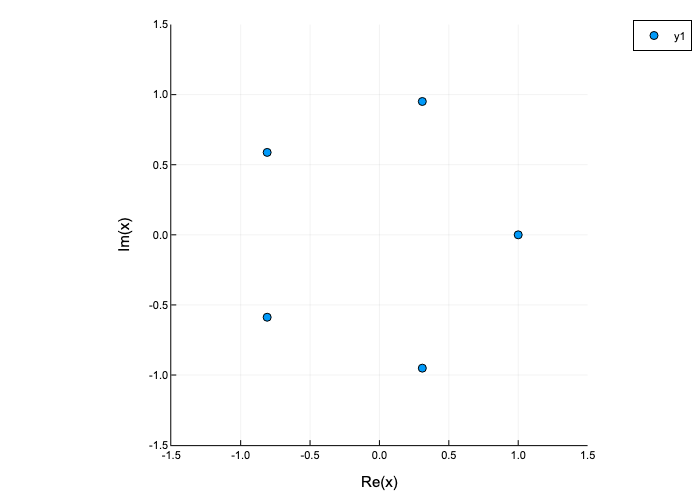

In [17]:
#複素数平面上に図示
real_parts = real.(Z)
imag_parts = imag.(Z)

using Plots

scatter(Z,
          xlim=(-1.5,1.5),
          ylim=(-1.5,1.5),
          aspectratio=true)

## 5. 漸化式と数列

In [18]:
# 漸化式 a₁ = 3, aₙ₊₁ = 2aₙ + 1
function efficient_sequence(n::Int)
    sequence = [3]  # a₁ = 3
    for i in 2:n
        push!(sequence, 2 * sequence[i-1] + 1)
    end
    return sequence
end

# 最初の10項を計算
terms = efficient_sequence(10)
println("漸化式 a₁ = 3, aₙ₊₁ = 2aₙ + 1 の最初の10項:")
for (i, term) in enumerate(terms)
    println("a$i = $term")
end

# 一般項の検証（予想: aₙ = 2^(n+1) - 1）
println("\n一般項の検証（予想: aₙ = 2^(n+1) - 1）:")
for i in 1:10
    predicted = 2^(i+1) - 1
    actual = terms[i]
    println("n=$i: 予想=$predicted, 実際=$actual, 一致=", predicted == actual)
end

漸化式 a₁ = 3, aₙ₊₁ = 2aₙ + 1 の最初の10項:
a1 = 3
a2 = 7
a3 = 15
a4 = 31
a5 = 63
a6 = 127
a7 = 255
a8 = 511
a9 = 1023
a10 = 2047

一般項の検証（予想: aₙ = 2^(n+1) - 1）:
n=1: 予想=3, 実際=3, 一致=true
n=2: 予想=7, 実際=7, 一致=true
n=3: 予想=15, 実際=15, 一致=true
n=4: 予想=31, 実際=31, 一致=true
n=5: 予想=63, 実際=63, 一致=true
n=6: 予想=127, 実際=127, 一致=true
n=7: 予想=255, 実際=255, 一致=true
n=8: 予想=511, 実際=511, 一致=true
n=9: 予想=1023, 実際=1023, 一致=true
n=10: 予想=2047, 実際=2047, 一致=true


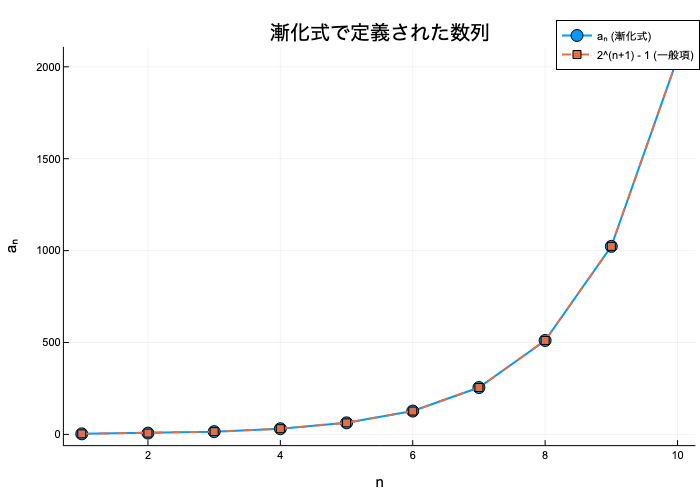

In [19]:
# 数列のグラフ化
n_values = 1:10
a_values = efficient_sequence(10)

plot(n_values, a_values, 
     label="aₙ (漸化式)", 
     lw=2, 
     marker=:circle, 
     markersize=6)

# 一般項との比較
general_values = [2^(n+1) - 1 for n in n_values]
plot!(n_values, general_values, 
      label="2^(n+1) - 1 (一般項)", 
      lw=2, 
      ls=:dash,
      marker=:square,
      markersize=4)

title!("漸化式で定義された数列")
xlabel!("n")
ylabel!("aₙ")
# yscale!(:log10)  # 対数スケール

## 6. 最適化問題

頂点と目的関数の値:
頂点1: (0, 0), 目的関数値: 0
頂点2: (0, 2.5), 目的関数値: 2.5
頂点3: (1, 0), 目的関数値: 1
頂点4: (0.46153846153846156, 2.1538461538461537), 目的関数値: 2.6153846153846154

最適解: x = 0.46153846153846156, y = 2.1538461538461537
最大値: 2.6153846153846154


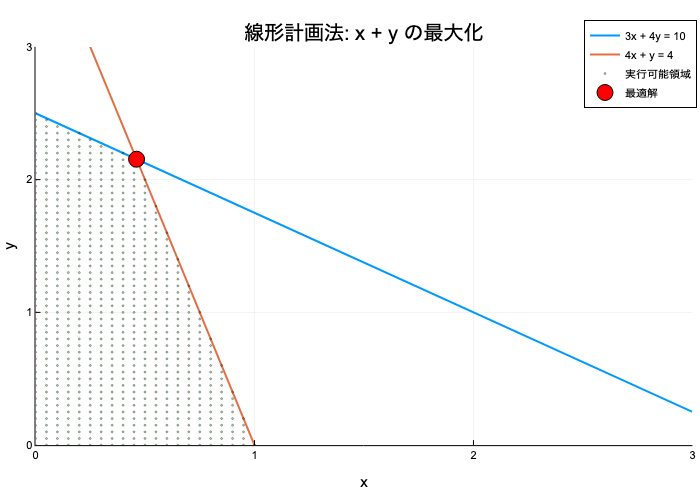

In [22]:
# 線形計画法の可視化
using Plots

# 制約条件: 3x + 4y ≤ 10, 4x + y ≤ 4, x ≥ 0, y ≥ 0
# 目的関数: x + y の最大化

# 制約条件を満たす領域を可視化
x_grid = 0:0.05:3
y_grid = 0:0.05:3

# 実行可能領域の判定
function is_feasible(x, y)
    return (3x + 4y ≤ 10) && (4x + y ≤ 4) && (x ≥ 0) && (y ≥ 0)
end

# 制約条件の境界線
x_line = 0:0.1:3
y1 = (10 .- 3*x_line) ./ 4  # 3x + 4y = 10
y2 = 4 .- 4*x_line           # 4x + y = 4

plot(x_line, y1, label="3x + 4y = 10", lw=2)
plot!(x_line, y2, label="4x + y = 4", lw=2)

# 実行可能領域の塗りつぶし
feasible_x = Float64[]
feasible_y = Float64[]

for x in x_grid
    for y in y_grid
        if is_feasible(x, y)
            push!(feasible_x, x)
            push!(feasible_y, y)
        end
    end
end

scatter!(feasible_x, feasible_y, 
         alpha=0.3, 
         color=:green, 
         markersize=1, 
         label="実行可能領域")

# 正しい頂点の計算
# 交点を求める: 3x + 4y = 10 と 4x + y = 4
# 3x + 4y = 10 ... (1)
# 4x + y = 4   ... (2)
# (2)より: y = 4 - 4x
# (1)に代入: 3x + 4(4 - 4x) = 10
# 3x + 16 - 16x = 10
# -13x = -6
# x = 6/13, y = 4 - 4(6/13) = 4 - 24/13 = 28/13

vertices = [
    (0, 0),           # 原点
    (0, 2.5),         # y軸との交点 (3×0 + 4y = 10 → y = 2.5)
    (1, 0),           # x軸との交点 (4x + y = 4, y = 0 → x = 1)
    (6/13, 28/13)     # 2つの制約線の交点
]

objective_values = [x + y for (x, y) in vertices]

println("頂点と目的関数の値:")
for (i, ((x, y), obj)) in enumerate(zip(vertices, objective_values))
    println("頂点$i: ($x, $y), 目的関数値: $obj")
end

optimal_idx = argmax(objective_values)
optimal_point = vertices[optimal_idx]
optimal_value = objective_values[optimal_idx]

println("\n最適解: x = $(optimal_point[1]), y = $(optimal_point[2])")
println("最大値: $(optimal_value)")

scatter!([optimal_point[1]], [optimal_point[2]], 
         color=:red, 
         markersize=8, 
         label="最適解")

title!("線形計画法: x + y の最大化")
xlabel!("x")
ylabel!("y")
xlims!(0, 3)
ylims!(0, 3)


関数 f(x, y) = x³ + y³ - 2xy の最適化結果:
最適解: x = 0.6666666666486842, y = 0.6666666666486842
最小値: -0.2962962962962963
収束: true


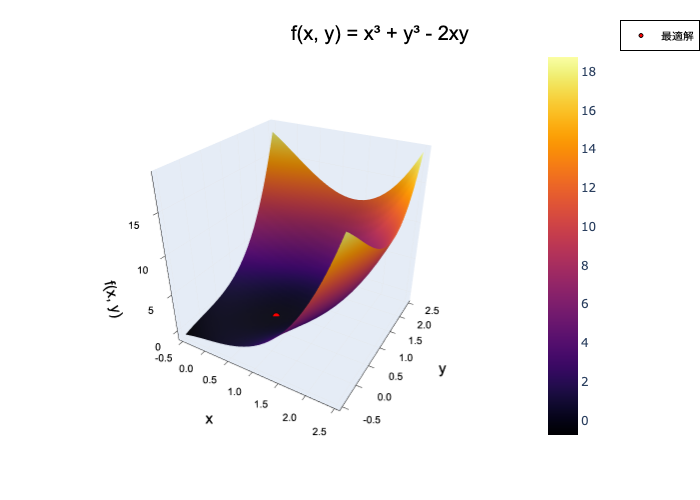

In [65]:
# 非線形最適化
using Optim

# 関数 f(x, y) = x³ + y³ - 2xy の最小値を求める
f(x) = x[1]^3 + x[2]^3 - 2*x[1]*x[2]

# 初期値
x0 = [0.5, 0.5]

# 制約なし最適化
result = optimize(f, x0, BFGS())
x_opt = Optim.minimizer(result)
min_f = Optim.minimum(result)

println("関数 f(x, y) = x³ + y³ - 2xy の最適化結果:")
println("最適解: x = $(x_opt[1]), y = $(x_opt[2])")
println("最小値: $min_f")
println("収束: ", Optim.converged(result))

# 関数の3Dプロット
x_range = -0.5:0.1:2.5
y_range = -0.5:0.1:2.5
z_vals = [xi^3 + yi^3 - 2*xi*yi for xi in x_range, yi in y_range]

surface(x_range, y_range, z_vals, 
        title="f(x, y) = x³ + y³ - 2xy",
        xlabel="x",
        ylabel="y",
        zlabel="f(x, y)")

# 最適解をプロット上に表示
scatter3d!([x_opt[1]], [x_opt[2]], [min_f], 
           color=:red, 
           markersize=2, 
           label="最適解")

## 7. 統計・確率

### 問題：スマートフォン利用率の調査

ある高校の生徒150名を無作為に選んで調査したところ、スマートフォンを所有している生徒は126名でした。

この高校の生徒全体におけるスマートフォン所有率（母比率 p）について、信頼度95%の信頼区間を求めなさい。

#### 与えられた情報
- 標本サイズ：n = 150名
- スマートフォン所有者数：x = 126名
- 標本比率：p̂ = 126/150 = 0.84
- 信頼度：95%（有意水準 α = 0.05）

#### 理論
大標本の場合、標本比率 p̂ は近似的に正規分布 N(p, p(1-p)/n) に従います。
信頼区間は p̂ ± z_{α/2} × √(p̂(1-p̂)/n) で計算されます。

In [58]:
# 母比率の信頼区間（Wald法）
using Distributions

n = 150  # サンプルサイズ
x = 126  # 成功数（スマートフォン所有者）
p̂ = x / n  # 標本比率
α = 0.05  # 有意水準
confidence_level = 1 - α

# 標準誤差
se = sqrt(p̂ * (1 - p̂) / n)

# 臨界値（両側検定）
z_critical = quantile(Normal(), 1 - α/2)

# 信頼区間
lower = p̂ - z_critical * se
upper = p̂ + z_critical * se

println("=== スマートフォン所有率の信頼区間 ===")
println("標本サイズ: $n 人")
println("所有者数: $x 人")
println("標本比率: p̂ = $(round(p̂, digits=4))")
println("標準誤差: SE = $(round(se, digits=4))")
println("臨界値: z_{α/2} = $(round(z_critical, digits=3))")
println("")
println("$(Int(confidence_level*100))%信頼区間: ($(round(lower, digits=4)), $(round(upper, digits=4)))")
println("")
println("解釈: この高校のスマートフォン所有率は")
println("$(round(lower*100, digits=1))% ～ $(round(upper*100, digits=1))% の間にあると")
println("$(Int(confidence_level*100))%の信頼度で推定されます。")

=== スマートフォン所有率の信頼区間 ===
標本サイズ: 150 人
所有者数: 126 人
標本比率: p̂ = 0.84
標準誤差: SE = 0.0299
臨界値: z_{α/2} = 1.96

95%信頼区間: (0.7813, 0.8987)

解釈: この高校のスマートフォン所有率は
78.1% ～ 89.9% の間にあると
95%の信頼度で推定されます。


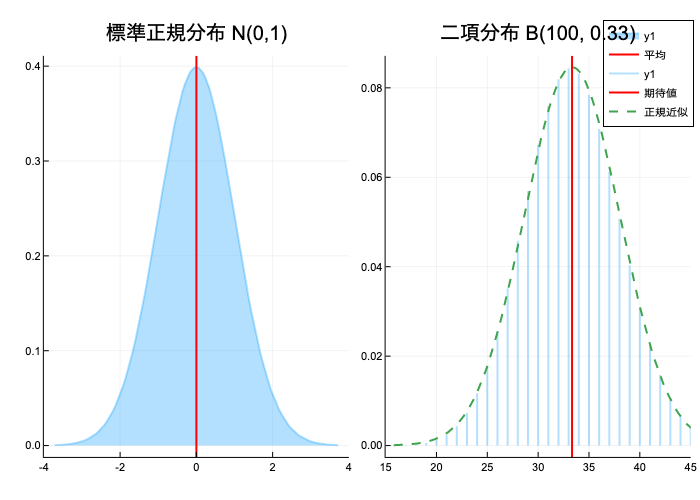

In [59]:
# 正規分布と二項分布の可視化
using StatsPlots

# 正規分布
p1 = plot(Normal(0, 1), 
         xlim=(-4, 4), 
         title="標準正規分布 N(0,1)", 
         lw=2, 
         fill=true, 
         alpha=0.3)
vline!([0], color=:red, lw=2, label="平均")

# 二項分布
n_binom = 100
p_binom = 1/3
binom_dist = Binomial(n_binom, p_binom)

p2 = plot(binom_dist, 
         title="二項分布 B($n_binom, $(round(p_binom, digits=2)))", 
         lw=2, 
         fill=true, 
         alpha=0.3)
vline!([n_binom * p_binom], color=:red, lw=2, label="期待値")

# 正規近似との比較
normal_approx = Normal(n_binom * p_binom, sqrt(n_binom * p_binom * (1 - p_binom)))
plot!(p2, normal_approx, 
     xlim=(15, 45), 
     lw=2, 
     ls=:dash, 
     label="正規近似")

plot(p1, p2, layout=(1, 2), size=(800, 300))

## まとめ

このノートブックでは、Julia言語を使って高校数学の様々な分野を学習しました：

### 学習した内容
1. **基本計算**: 四則演算、関数定義、数学定数
2. **グラフ描画**: 2D・3D関数、媒介変数表示、リサージュ曲線
3. **方程式の解法**: 記号的解法（解の公式）と数値的解法
4. **数列と漸化式**: 再帰的定義、一般項の推定、グラフ化
5. **最適化問題**: 線形計画法、非線形最適化
6. **統計・確率**: 信頼区間、分布の可視化

### Julia言語の特徴
- **数学的記法**: √、π、÷などの記号が直接使用可能
- **高速な数値計算**: 科学技術計算に最適化された言語
- **豊富なライブラリ**: グラフ描画、統計、最適化などの専門パッケージ
- **インタラクティブ性**: ノートブック環境での試行錯誤が容易

### 教育的効果
- **理論と実践の融合**: 数学の概念を可視化・実験できる
- **問題解決能力**: 複雑な計算を分解して段階的に解決
- **データ分析スキル**: 統計的思考と計算技術の習得
- **プログラミング思考**: 論理的・構造的な思考力の向上

### 発展的学習への道筋
1. **大学数学への準備**: 線形代数、微積分学、統計学
2. **データサイエンス**: 機械学習、データ可視化
3. **科学計算**: 物理シミュレーション、数値解析
4. **プログラミング**: アルゴリズム設計、ソフトウェア開発

Julia言語を使うことで、数学の抽象的な概念を具体的に可視化し、実験的に理解を深めることができます。

理論と実践を結びつけることで、より深い数学的洞察が得られるでしょう。

## 参考資料

### その他のサイト

- [大学入試とJulia言語（JuliaTokai #21）](https://github.com/shimizudan/20250327tokyo-u?tab=readme-ov-file)
- [オンライン整数列大辞典(OEIS)に数列を登録してみた！](https://github.com/shimizudan/20250216sundaymath?tab=readme-ov-file)

### 参考サイト

- [Julia言語 ドキュメント（日本語翻訳版）](https://atelierarith.github.io/UnofficialJuliaDocJP/index.html) - ごまふあざらし(GomahuAzarashi)
- [数学と物理におけるJuliaの活用](https://akio-tomiya.github.io/julia_imi_workshop2023/)
- [数学ソフトウェアとフリードキュメント XXVIII での講演資料](https://github.com/genkuroki/msfd28/blob/master/README.md) - 黒木玄
- [中心極限定理の視覚化の例](https://colab.research.google.com/drive/1OKlTBuxXw_gA6oyzlk5ACInH2PaebdjC?usp=sharing) - 黒木玄
- [数値計算法基礎 (2023)](http://www.cas.cmc.osaka-u.ac.jp/~paoon/Lectures/2023-8Semester-NA-basic/01-guide-of-julia/) - 降籏大介
- [Juliaで学ぶ最適化と機械学習（2024）](https://matsui528.github.io/julia_opt_ml_2024/) - 松井勇佑

### 書籍

- [実践Julia入門](https://www.amazon.co.jp/実践Julia入門-後藤-俊介/dp/4297133504) - 後藤俊介
- [Juliaではじめる数値計算入門](https://www.amazon.co.jp/Julia%E3%81%A7%E3%81%AF%E3%81%98%E3%82%81%E3%82%8B%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E5%85%A5%E9%96%80-%E6%B0%B8%E4%BA%95-%E4%BD%91%E7%B4%80/dp/4297141280) - 永井佑紀
- [スタンフォード ベクトル・行列からはじめる最適化数学](https://www.amazon.co.jp/スタンフォード-ベクトル・行列からはじめる最適化数学-ＫＳ情報科学専門書-ステファン・ボイド-ebook/dp/B0967Y28B6) - スティーブン・ボイド他

### 学習のヒント

1. **環境構築**: Google ColabやJupyter Notebookを使用すると簡単に始められます
2. **パッケージ管理**: 必要なパッケージは `Pkg.add()` で簡単にインストール可能
3. **エラーへの対処**: エラーメッセージを読んで、一つずつ問題を解決していきましょう
4. **実験的学習**: 数値を変更して結果の変化を観察することで理解が深まります
5. **可視化の活用**: グラフで結果を確認することで直感的理解が得られます

### コミュニティ

- [Julia言語 公式フォーラム](https://discourse.julialang.org/)
- [Julia Tokyo（日本のコミュニティ）](https://juliatokyo.connpass.com/)
- [GitHub Julia Organization](https://github.com/JuliaLang)

このノートブックを参考に、ぜひJulia言語を使った数学的探究を楽しんでください！